In [1]:
%pylab inline
from utils import *
from data import *
from scoring import *

Populating the interactive namespace from numpy and matplotlib


# Some general notes

* The data has been perpared by running add_measures.py, which adds avg and stddev of speed and course for various sizes of a rolling window (from 30min to 24h).

* **We use a random forests**

* We determine, for each gear type, what the optimal window size is by running the regression for each window size and a fixed polynomial degree.


# Longliners
## Longliners using Alex' data
Train the algorithm using Alex' data, then evaluate on both Alex' and Kristinas data

fraction fishing: 0.686810152823
fraction fishing: 0.756842796539
Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0248203777297, cross=0.184632799221
3600: Fitting... Scoring... Calc.err... train=0.0233901042058, cross=0.175991341739
10800: Fitting... Scoring... Calc.err... train=0.0193820332027, cross=0.152098217911
21600: Fitting... Scoring... Calc.err... train=0.0172826149524, cross=0.129839332778
43200: Fitting... Scoring... Calc.err... train=0.01728363, cross=0.1233038
86400: Fitting... Scoring... Calc.err... train=0.01754169, cross=0.1598384


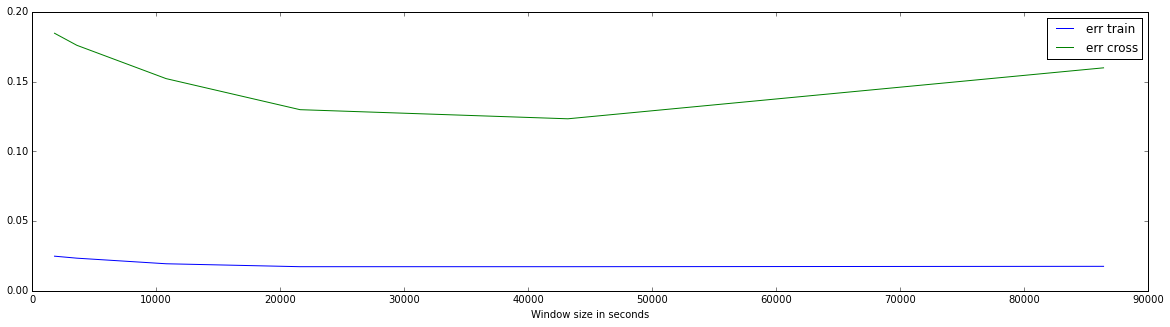

Best window size: 43200
Evaluation using Alex' data:


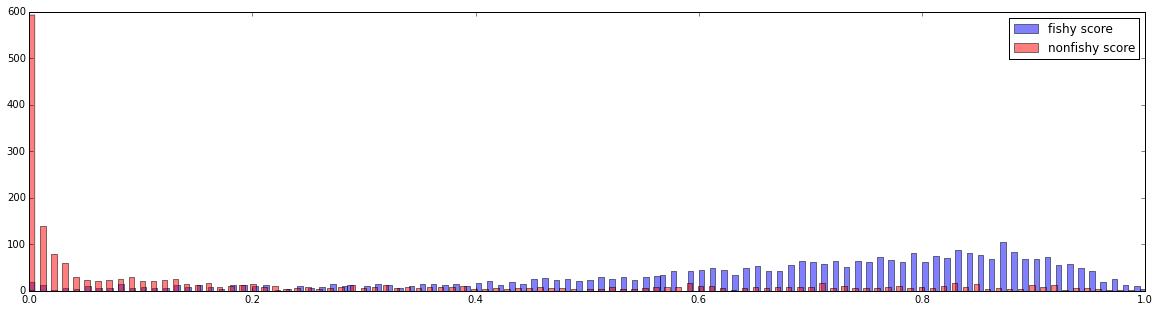

Squared numerical error: 0.13857734
Error (overlap): 15.2%
Error (overlap) above cutoff of 0.5: 1.2%
For cutoff of 0.5
True positives 2468
False positives 363
True negatives 1407
False negatives 530
accuracy 0.775
precision 0.87177675733
recall 0.823215476985
f1 0.846800480357


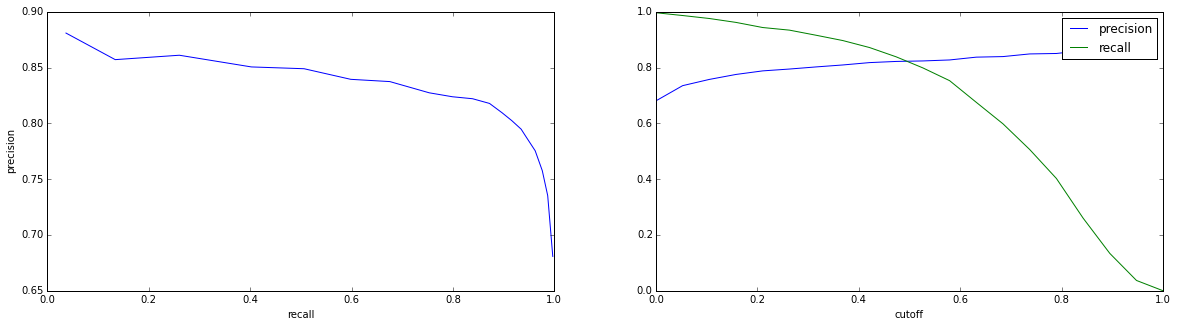

Score window: [43200]
Evaluate using Kristinas data:


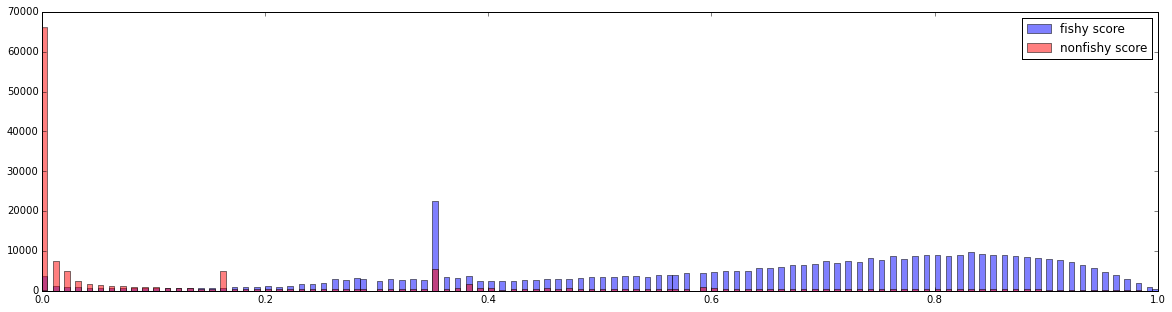

Squared numerical error: 0.162919633751
Error (overlap): 20.0423526437%
Error (overlap) above cutoff of 0.5: 11.5932209487%
For cutoff of 0.5
True positives 314222
False positives 19335
True negatives 119144
False negatives 116803
accuracy 0.760953391021
precision 0.942033895256
recall 0.729011078244
f1 0.821944539631


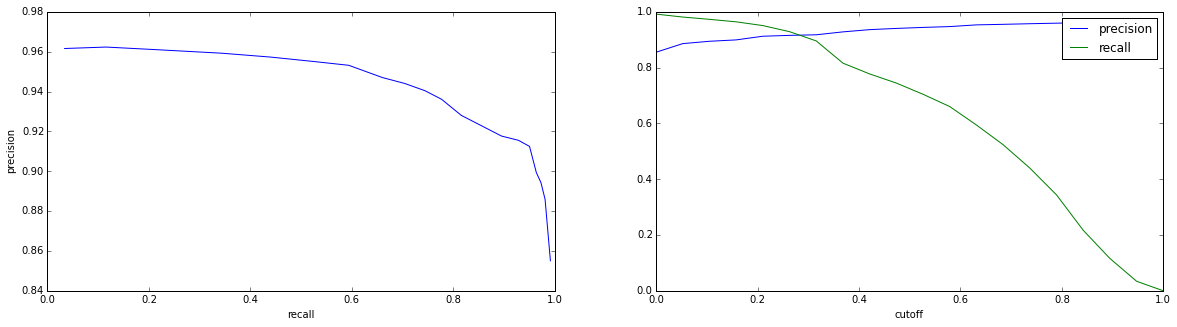

Score window: [43200]


In [2]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('classified-filtered.npz')
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel(
                                    'datasets/kristina_longliner.measures.npz')
min_window = optimize_window_size(xtrain, xcross)
print "Evaluation using Alex' data:"
evaluate_score(xtrain, xtest, [min_window])
print "Evaluate using Kristinas data:"
evaluate_score(xtrain, _x, [min_window])

# Longliners using Kristinas' data
Train the algorithm using Kristinas data, and evaluate using a separate subset of Kristinas data.

In [3]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

fraction fishing: 0.756842796539


Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0286765415059, cross=0.186405145516
3600: Fitting... Scoring... Calc.err... train=0.0242744145126, cross=0.185248379006
10800: Fitting... Scoring... Calc.err... train=0.0143084967879, cross=0.170853903487
21600: Fitting... Scoring... Calc.err... train=0.0119136448124, cross=0.161968648415
43200: Fitting... Scoring... Calc.err... train=0.00992061, cross=0.13169532
86400: Fitting... Scoring... Calc.err... train=0.00903993, cross=0.14999782


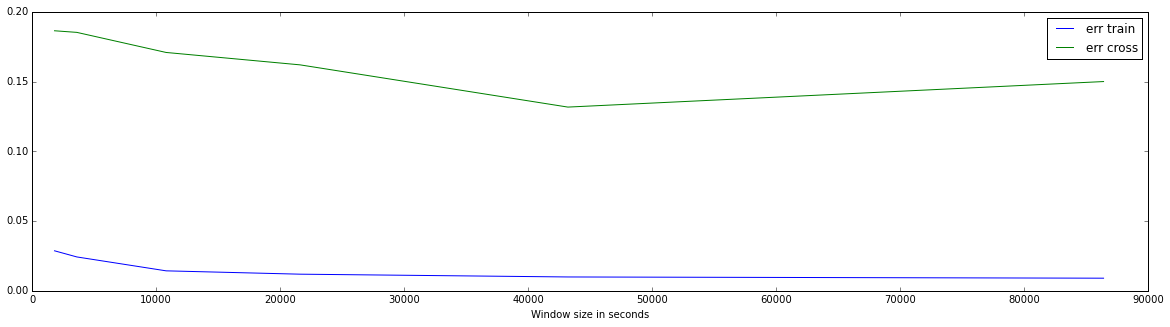

Best window size: 43200


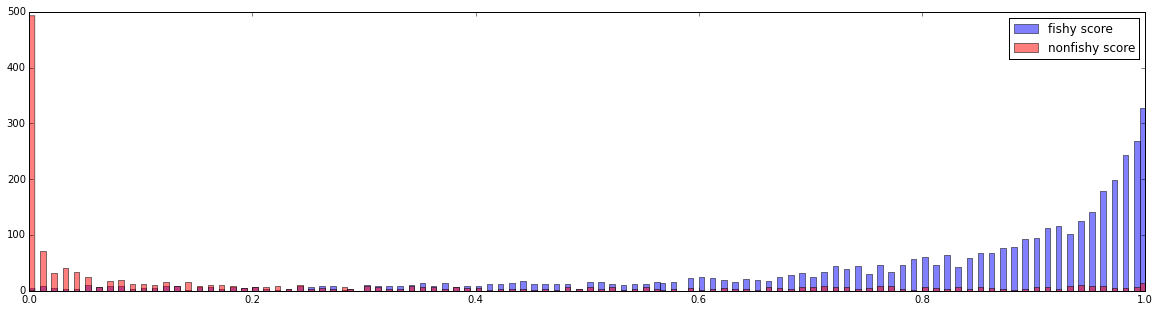

Squared numerical error: 0.09970718
Error (overlap): 20.72%
Error (overlap) above cutoff of 0.5: 14.709963919%
For cutoff of 0.5
True positives 3338
False positives 265
True negatives 1006
False negatives 391
accuracy 0.8688
precision 0.926450180405
recall 0.895146151783
f1 0.910529187125


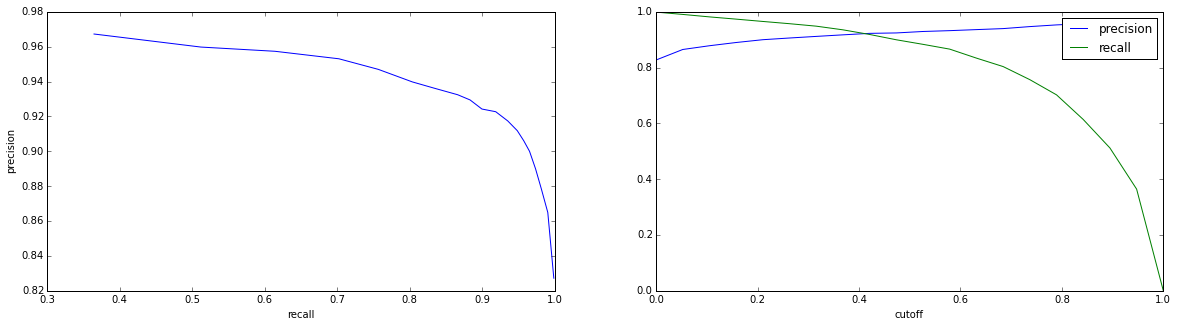

Score window: [43200]


In [4]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.0247, cross=0.2346
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.0178, cross=0.2446
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.0039, cross=0.2
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0014, cross=0.1872
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0, cross=0.1502
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0, cross=0.1384


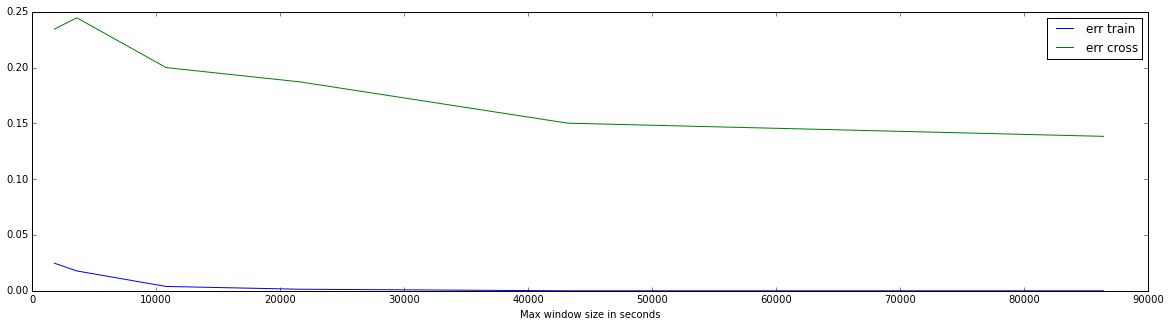

Best window sizes: [1800, 3600, 10800, 21600, 43200, 86400]


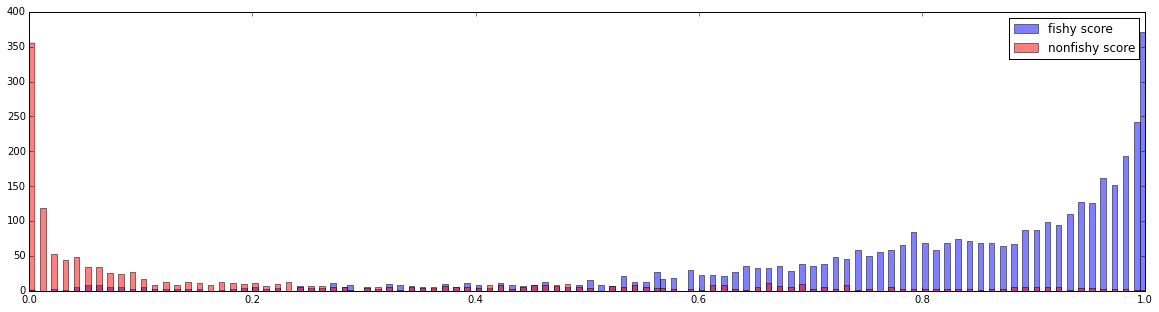

Squared numerical error: 0.08004492
Error (overlap): 16.4%
Error (overlap) above cutoff of 0.5: 11.0807860262%
For cutoff of 0.5
True positives 3461
False positives 203
True negatives 1068
False negatives 268
accuracy 0.9058
precision 0.944596069869
recall 0.928130866184
f1 0.936291086163


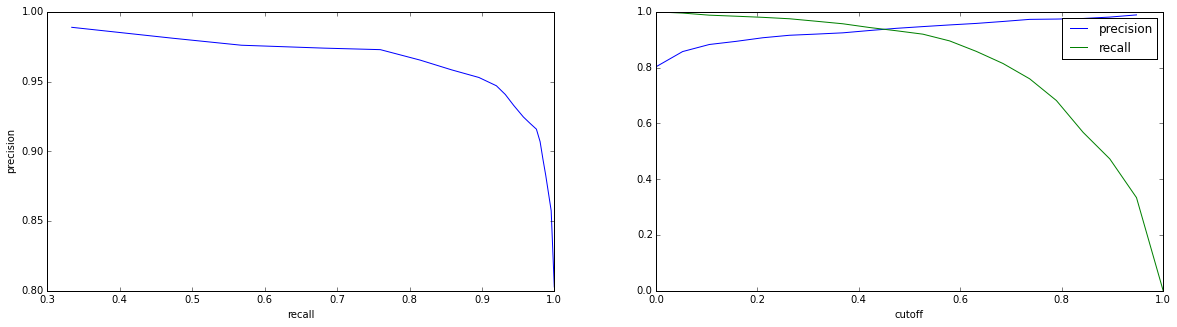

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [5]:
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)

# Diferences between the datasets
How does the two labeled datasets differ in their labeleing? Alex only has labeled data for longliners, so that's what we'll compare:

fraction fishing: 0.686810152823
fraction fishing: 0.756842796539


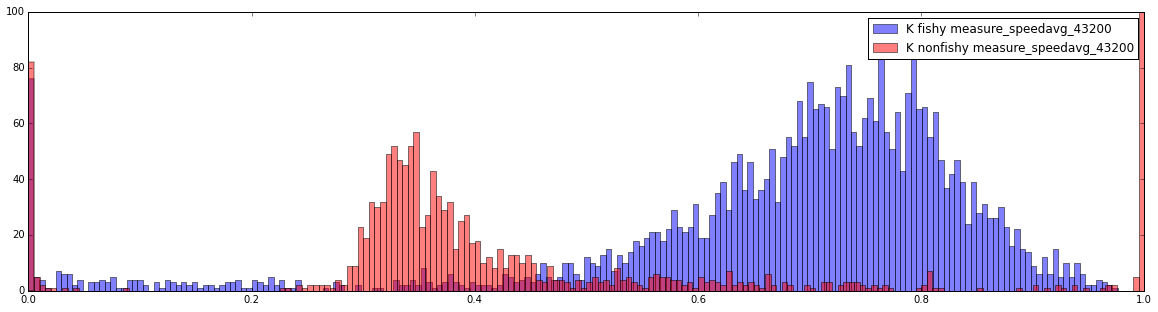

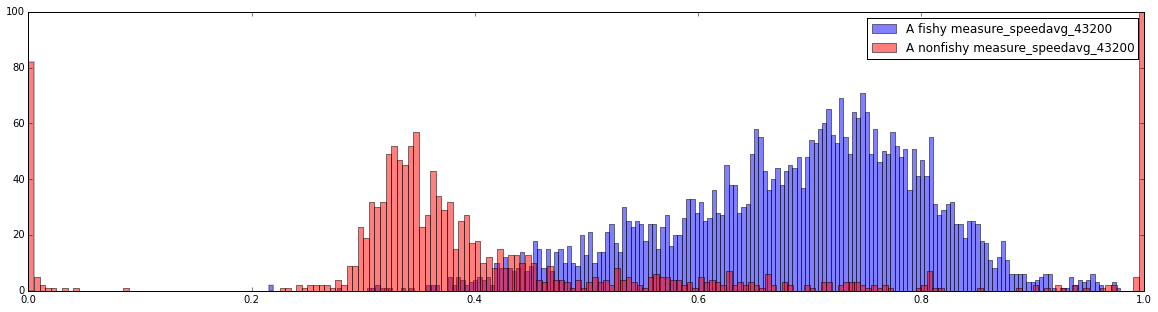

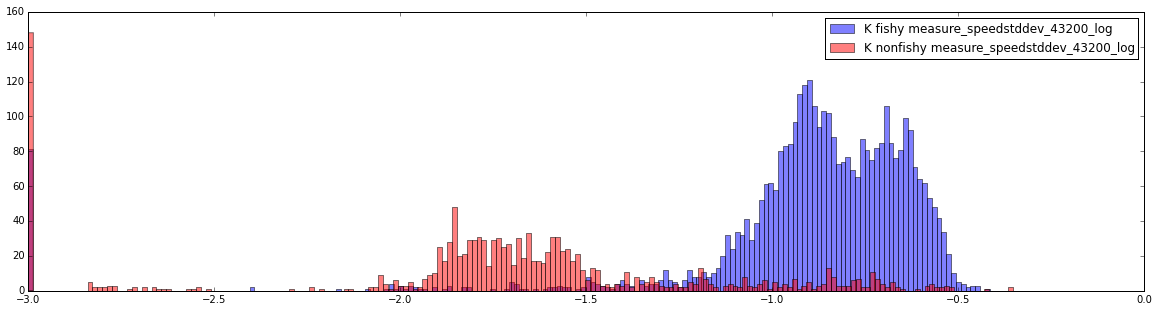

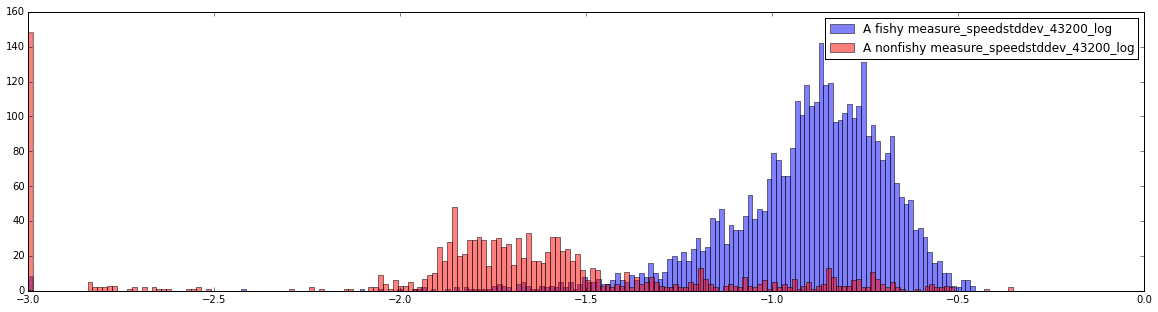

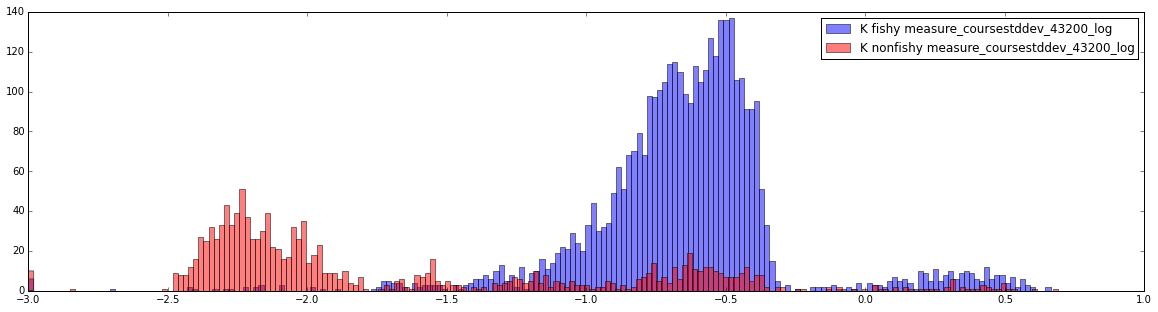

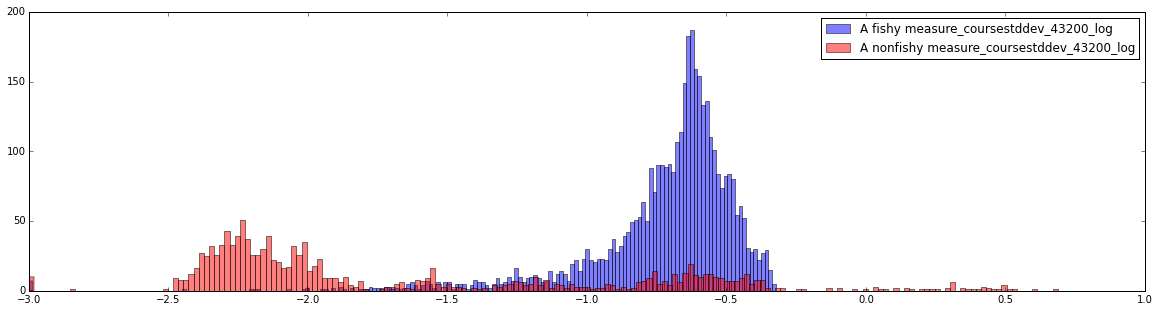

In [6]:
_x, _xtrain, _xcross, _xtest = load_dataset_by_vessel('classified-filtered.npz')
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_longliner.measures.npz')

xfishy = fishy(xtest)
xnonfishy = nonfishy(xtest)
_xfishy = fishy(_xtest)
_xnonfishy = nonfishy(xtest)
window = 43200
for col in ('measure_speedavg_%s' % window,
        'measure_speedstddev_%s_log' % window,
        'measure_coursestddev_%s_log' % window):
    figure(figsize=(20,5))
    hist(xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="K fishy " + col)
    hist(xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="K nonfishy " + col)
    legend()
    show()

    figure(figsize=(20,5))
    hist(_xfishy[col], bins=200, normed=False, color='b', alpha=0.5, label="A fishy " + col)
    hist(_xnonfishy[col], bins=200, normed=False, color='r', alpha=0.5, label="A nonfishy " + col)
    legend()
    show()

# Trawlers

In [7]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_trawl.measures.npz')

fraction fishing: 0.576701426538


Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0197613221118, cross=0.191824674007
3600: Fitting... Scoring... Calc.err... train=0.0166799814473, cross=0.183750499918
10800: Fitting... Scoring... Calc.err... train=0.0129968208994, cross=0.185684050243
21600: Fitting... Scoring... Calc.err... train=0.0132546087634, cross=0.192964698739
43200: Fitting... Scoring... Calc.err... train=0.01479511, cross=0.20822212
86400: Fitting... Scoring... Calc.err... train=0.01655412, cross=0.22701652


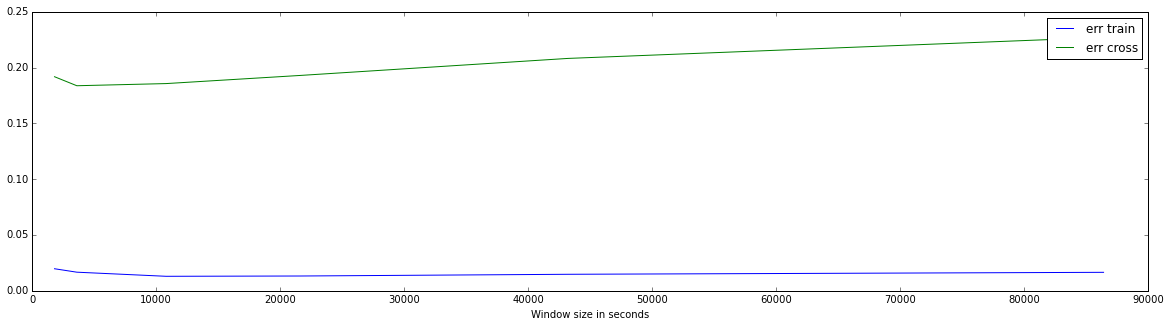

Best window size: 3600


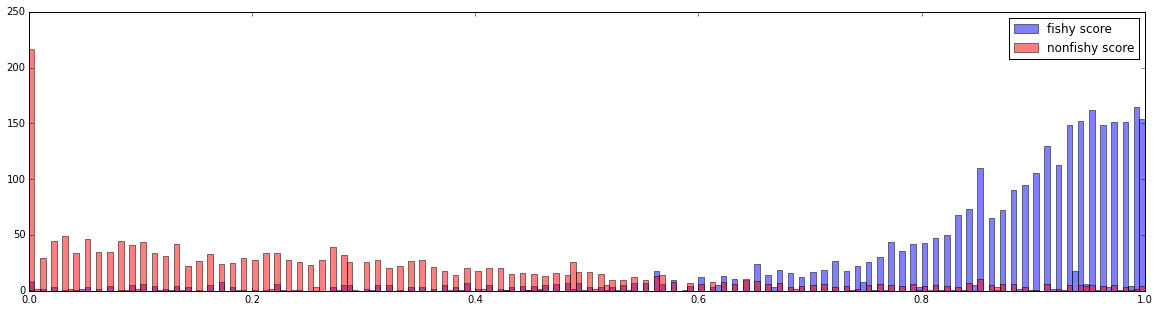

Squared numerical error: 0.0880857107112
Error (overlap): 17.84%
Error (overlap) above cutoff of 0.5: 16.9640062598%
For cutoff of 0.5
True positives 2847
False positives 348
True negatives 1624
False negatives 181
accuracy 0.8942
precision 0.891079812207
recall 0.940224570674
f1 0.914992768761


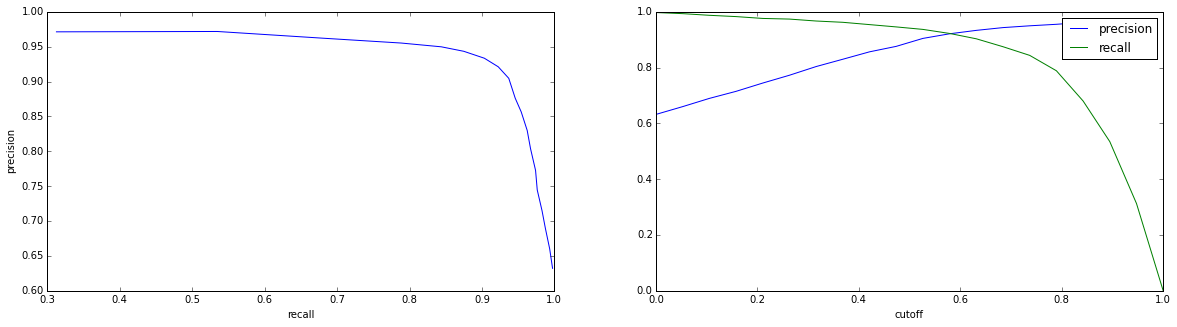

Score window: [3600]


In [8]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.0125, cross=0.2628
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.0081, cross=0.271
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.001, cross=0.2556
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0004, cross=0.249
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0, cross=0.2346
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0, cross=0.2328


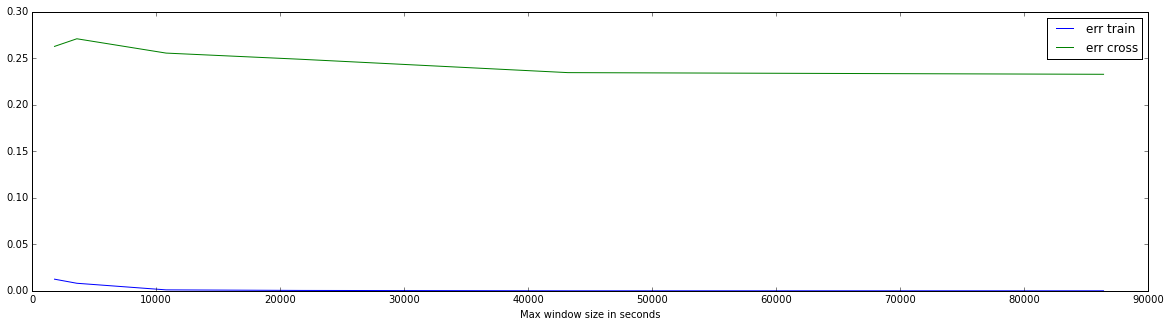

Best window sizes: [1800, 3600, 10800, 21600, 43200, 86400]


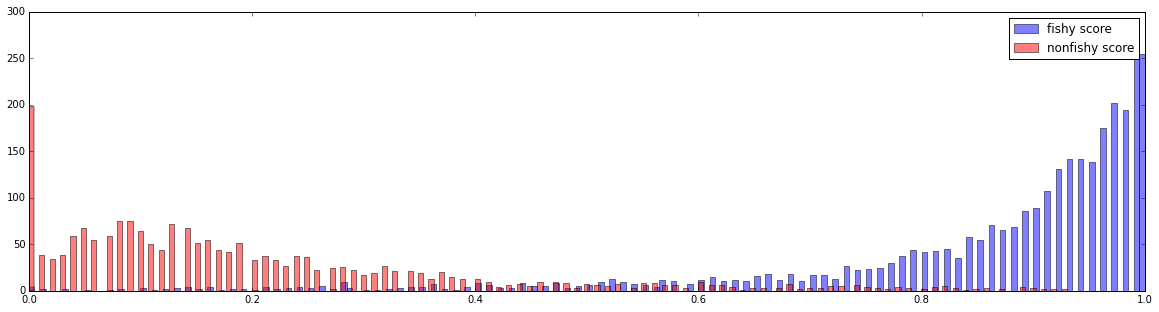

Squared numerical error: 0.05905036
Error (overlap): 6.32%
Error (overlap) above cutoff of 0.5: 5.667752443%
For cutoff of 0.5
True positives 2873
False positives 176
True negatives 1796
False negatives 155
accuracy 0.9338
precision 0.942276156117
recall 0.948811096433
f1 0.945532335034


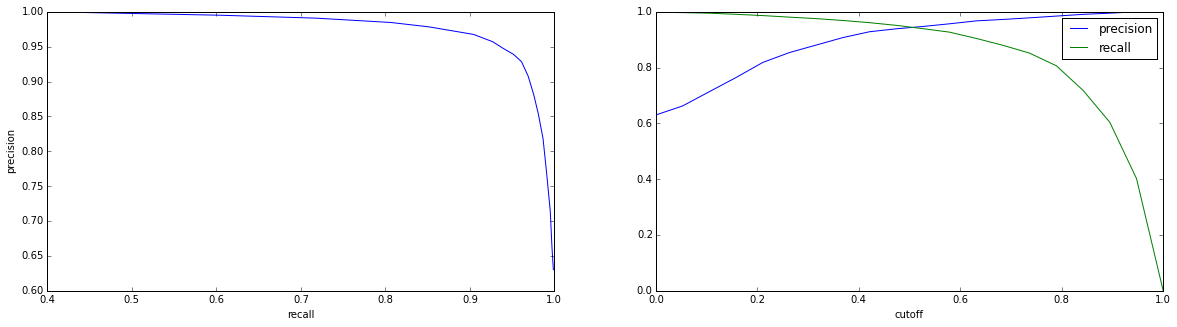

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [9]:
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)

# Purse seiners

In [11]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz')

fraction fishing: 0.0473906797995


Fitting an optimal window size for avg/stddev columns
1800: Fitting... Scoring... Calc.err... train=0.0149956506991, cross=0.148765977458
3600: Fitting... Scoring... Calc.err... train=0.0133820100465, cross=0.141590733035
10800: Fitting... Scoring... Calc.err... train=0.0104502696485, cross=0.150181353544
21600: Fitting... Scoring... Calc.err... train=0.0102563044774, cross=0.158948152821
43200: Fitting... Scoring... Calc.err... train=0.00967359, cross=0.15264854
86400: Fitting... Scoring... Calc.err... train=0.00828218, cross=0.141301


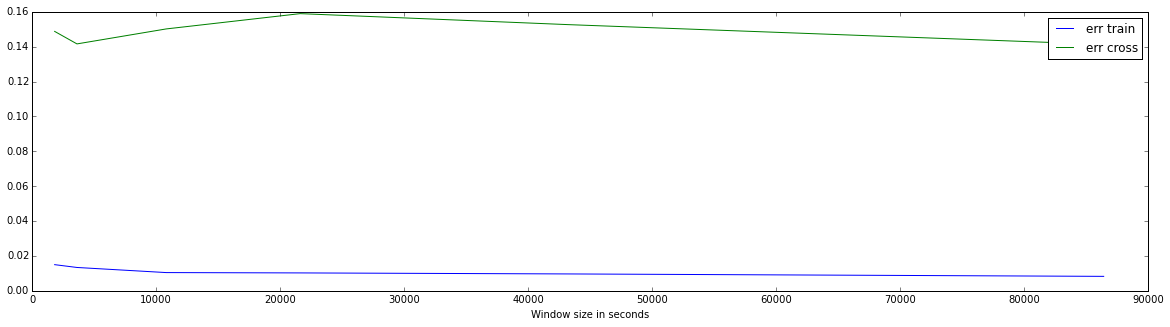

Best window size: 86400


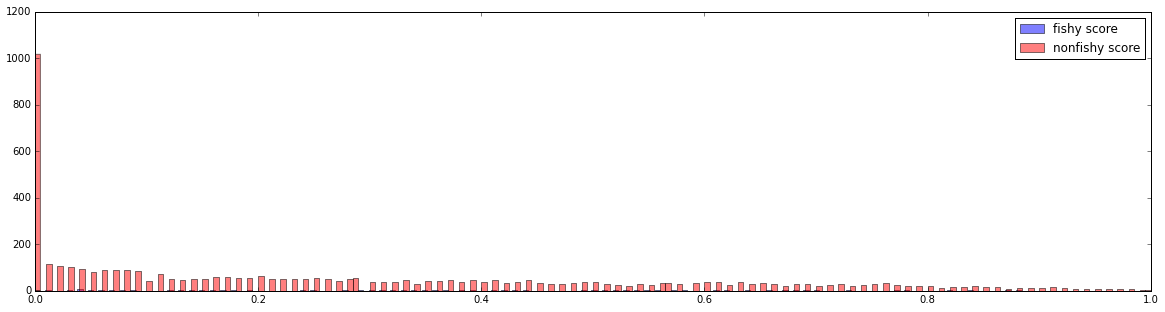

Squared numerical error: 0.15685216
Error (overlap): 3.8%
Error (overlap) above cutoff of 0.5: 7.00460829493%
For cutoff of 0.5
True positives 88
False positives 1093
True negatives 3708
False negatives 111
accuracy 0.7592
precision 0.0745131244708
recall 0.442211055276
f1 0.127536231884


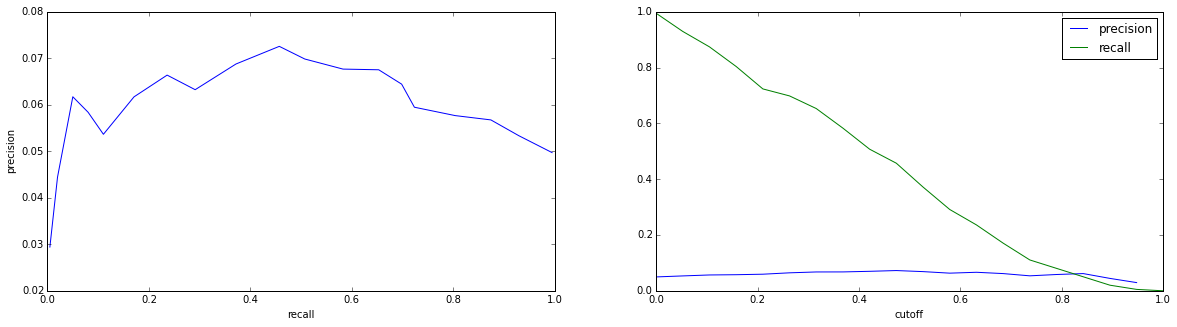

Score window: [86400]


In [12]:
min_window = optimize_window_size(xtrain, xcross)
evaluate_score(xtrain, xtest, [min_window])

Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.0101, cross=0.2222
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.0084, cross=0.1918
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.0029, cross=0.1716
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0018, cross=0.1724
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0, cross=0.1516
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0, cross=0.1268


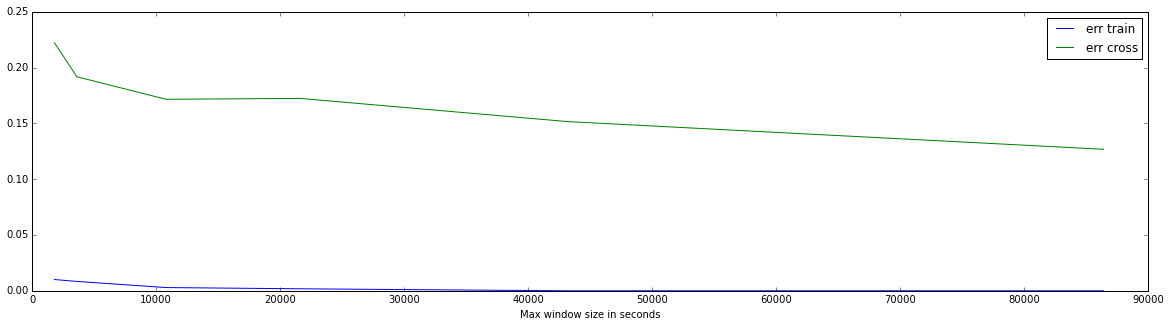

Best window sizes: [1800, 3600, 10800, 21600, 43200, 86400]


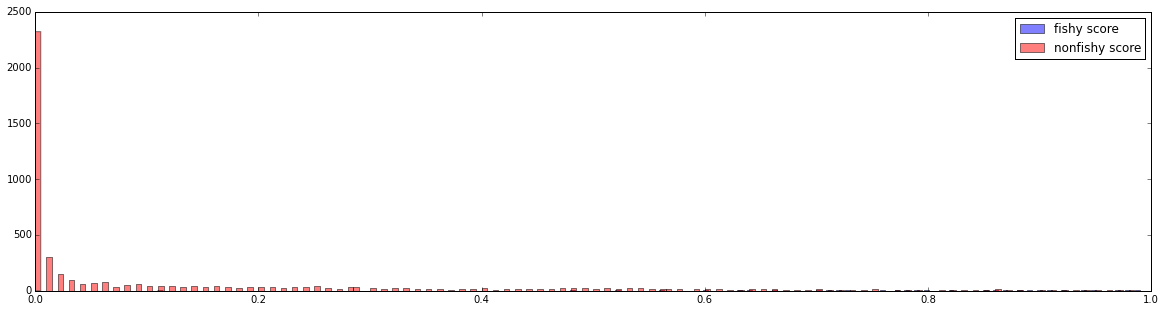

Squared numerical error: 0.072631
Error (overlap): 4.32%
Error (overlap) above cutoff of 0.5: 21.2598425197%
For cutoff of 0.5
True positives 151
False positives 502
True negatives 4299
False negatives 48
accuracy 0.89
precision 0.23124042879
recall 0.758793969849
f1 0.354460093897


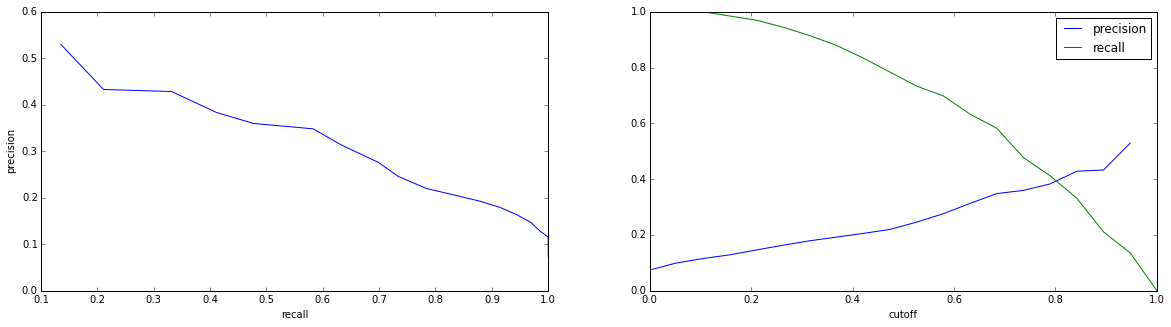

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [13]:
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)

fraction fishing: 0.0473906797995
Fitting an optimal window size set for avg/stddev columns
For now uses a set from minimum window size up to X
[1800]: Fitting... Scoring... Calc.err... train=0.0025, cross=0.0456
[1800, 3600]: Fitting... Scoring... Calc.err... train=0.0016, cross=0.0476
[1800, 3600, 10800]: Fitting... Scoring... Calc.err... train=0.0006, cross=0.0482
[1800, 3600, 10800, 21600]: Fitting... Scoring... Calc.err... train=0.0004, cross=0.047
[1800, 3600, 10800, 21600, 43200]: Fitting... Scoring... Calc.err... train=0.0, cross=0.0458
[1800, 3600, 10800, 21600, 43200, 86400]: Fitting... Scoring... Calc.err... train=0.0, cross=0.044


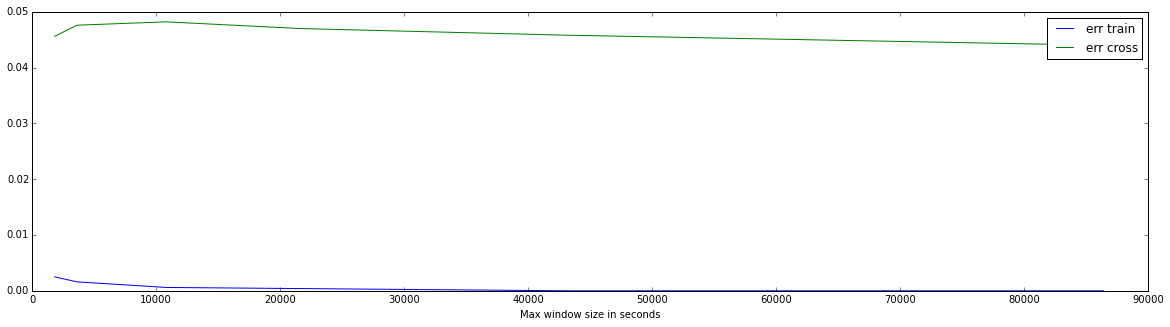

Best window sizes: [1800, 3600, 10800, 21600, 43200, 86400]


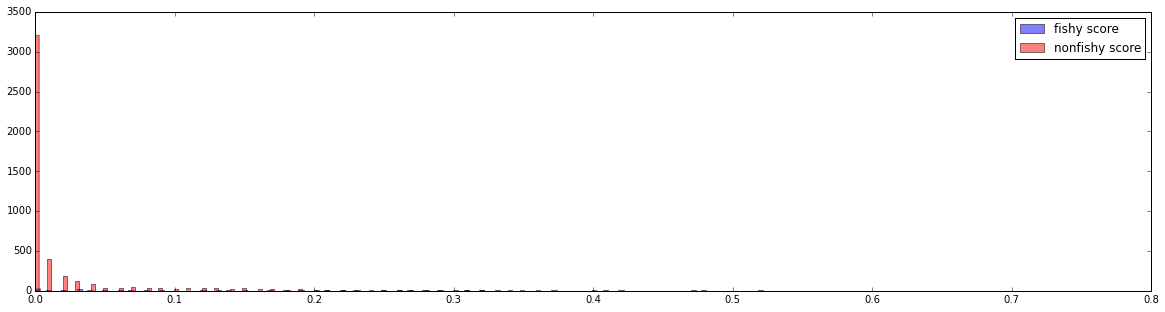

Squared numerical error: 0.05280506
Error (overlap): 4.52%
Error (overlap) above cutoff of 0.5: 41.6666666667%
For cutoff of 0.5
True positives 32
False positives 2
True negatives 4627
False negatives 339
accuracy 0.9318
precision 0.941176470588
recall 0.0862533692722
f1 0.158024691358


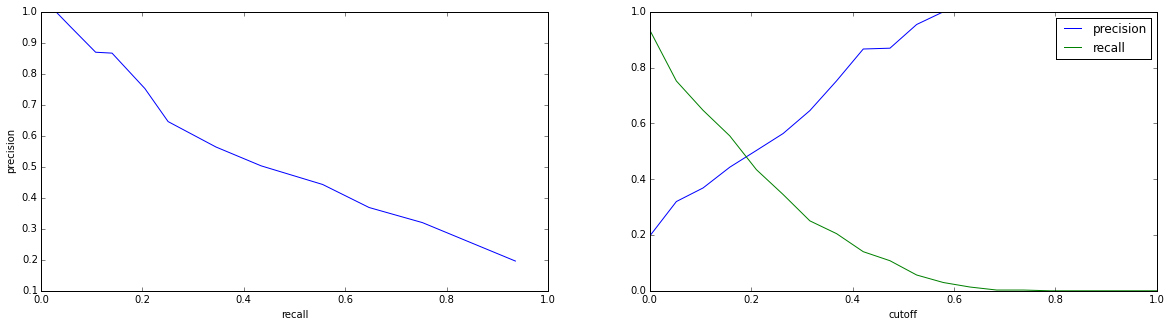

Score window: [1800, 3600, 10800, 21600, 43200, 86400]


In [14]:
x, xtrain, xcross, xtest = load_dataset_by_vessel('datasets/kristina_ps.measures.npz', matched=False)
best_windows = optimize_multi_window_sizes(xtrain, xcross)
evaluate_score(xtrain, xtest, best_windows)